In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from urllib.parse import urlparse, parse_qs # parsing urls
import string
import re
from sys import platform
import os

# default
PATH_DELIMITER = '\\'
path = "C:\\Users\\georg\\Dropbox\\url_classifier\\runs\\10000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_expert0"
plot_path = "C:\\Users\\georg\\Dropbox\\url_classifier\\plots"
if platform == 'darwin':
    # OSX
    PATH_DELIMITER = '/'
    path = os.getcwd() + '/runs'
    plot_path = os.getcwd() + '/plots'
    
folder = os.path.basename(path)
print('folder', folder)
print('runs', path)
print('plots', plot_path)

folder runs
runs /Users/aloha/Projects/URLNet/runs
plots /Users/aloha/Projects/URLNet/plots


In [2]:
CHAR = 1
WORD = 2 # delim = 0
CHAR_AND_WORD = 3
CHARWORD_AND_WORD = 4
CHARWORD_AND_WORD_AND_CHAR = 5

In [3]:
tmp = pd.DataFrame()
df = pd.DataFrame()

for folder in os.listdir(path):
    try:
        #print(folder)
        trainsize = re.match('(^\d+)', folder).group(0)
        emb = re.match('^\d+_emb(\d)', folder).group(1)
        dlm = re.match('^\d+_emb\d_dlm(\d)', folder).group(1)
        expert = re.match('.*expert(\d)', folder).group(1)
        tmp = pd.read_csv(path + PATH_DELIMITER + folder + PATH_DELIMITER + 'train_' + trainsize + '_test_' + trainsize + '.auc', 
                         skiprows = 6, sep = '\t', header = 0, names=["decision_boundery", "TP", "FP", "TPR", "FPR"], nrows = 21)
        tmp['folder'] = folder 
        tmp['train_size'] = int(trainsize)
        tmp['embed_mode'] = int(emb)
        tmp['delimit_mode'] = int(dlm)
        tmp['expert_mode'] = int(expert)
        df = df.append(tmp, ignore_index= True) 
        #print(folder + ' ; ' + trainsize + ' ; ' + emb + ' ; '+ 'No of rows: ' + str(df.shape[0]))
    except Exception as e:
        print(e)
        #print(folder)
        pass

'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'


In [4]:
df.head()

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
0,1.000000,2,0,0.000063,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
1,0.999955,1584,0,0.050036,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
2,0.999920,3167,0,0.100041,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
3,0.999838,4750,0,0.150046,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
4,0.999635,6333,0,0.200051,0.0,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0


In [5]:
# df.to_csv('D:\\georg\\python_projects\\deeplearning\\URLNet\\auc_all.csv')

In [6]:
# only analyze three cases: URLNet (character-level), URLNet (word-level), URLNet (full)
emb_filter = ((df.embed_mode == CHAR) | ((df.embed_mode == WORD) & (df.delimit_mode == 0)) | (df.embed_mode == CHARWORD_AND_WORD_AND_CHAR))
df_small = df[(df.train_size == 1000) & emb_filter]
df_med = df[(df.train_size == 10000) & emb_filter]
df_large = df[(df.train_size == 50000) & emb_filter]
df_full = df[(df.train_size == 500000) & emb_filter]

In [7]:
def plotauc(df):
    import matplotlib.pyplot as plt
    %matplotlib inline
    df_ = df

    fig, ax = plt.subplots(1,1, figsize = (10,10))
    legends = []
    for name, group in df_.groupby("folder"):
        embed_mode = int(group['embed_mode'].mean())
        expert_mode = int(group['expert_mode'].mean())
        legend = 'URLNet'
        
        if embed_mode == CHAR:
            color = 'royalblue'
            legend += '(Character-level)'
        elif embed_mode == WORD:
            color = 'blueviolet'
            legend += '(Word-level)'
        elif embed_mode == CHARWORD_AND_WORD_AND_CHAR:
            color = 'darkcyan'
            legend += '(Full)'
        else:
            raise Exception("unknown embed_mode %s" % embed_mode)
        legends.append(legend)
        linestyle = 'dashed'
        if expert_mode == 1:
            legend += "+ Expert Feature"
            linestyle = 'solid'
        group.plot(x = 'FPR', y = 'TPR', ax = ax, label=legend, color=color, linestyle=linestyle)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.xscale('log')
    ax.set_ylim([0,1])
    ax.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
    
    
    datasize = int(group['train_size'].mean())
    title = 'AUC, train size %d, test size %d' % (datasize, datasize)
    plt.title(title)
    lgd = plt.legend( loc='best')
    plt.show()
    filename = '%s_%s' % (title, '_'.join(legends))
    fig.savefig(plot_path+'/%s.png' % filename, bbox='tight')
    return plt

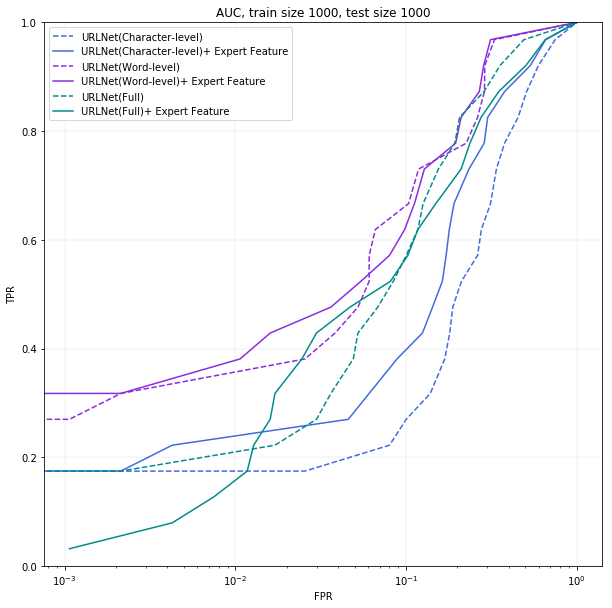

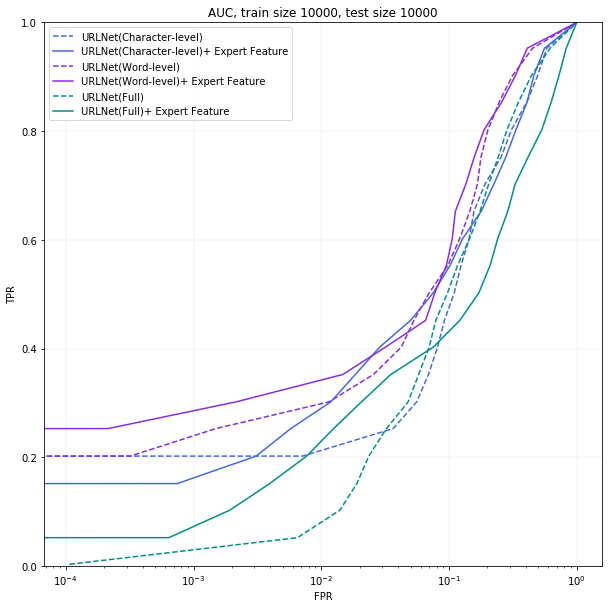

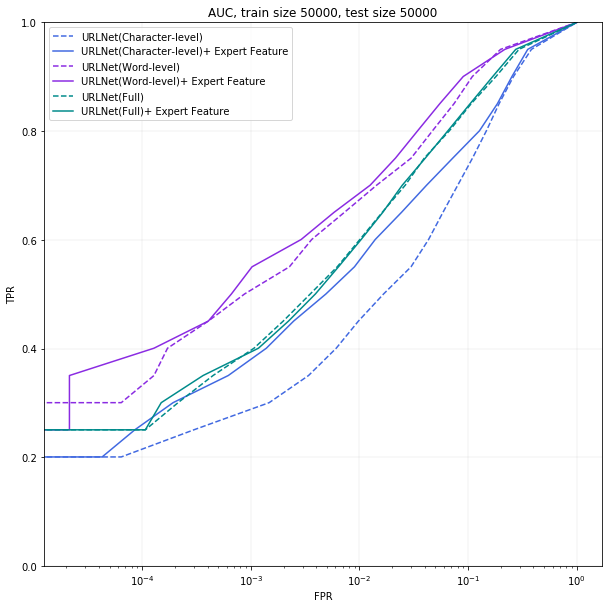

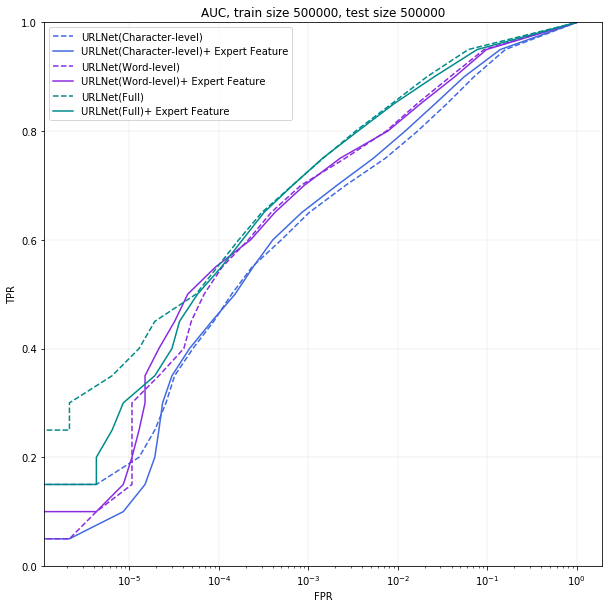

In [8]:
# plot all
for df in [df_small, df_med, df_large, df_full]:
    plotauc(df)


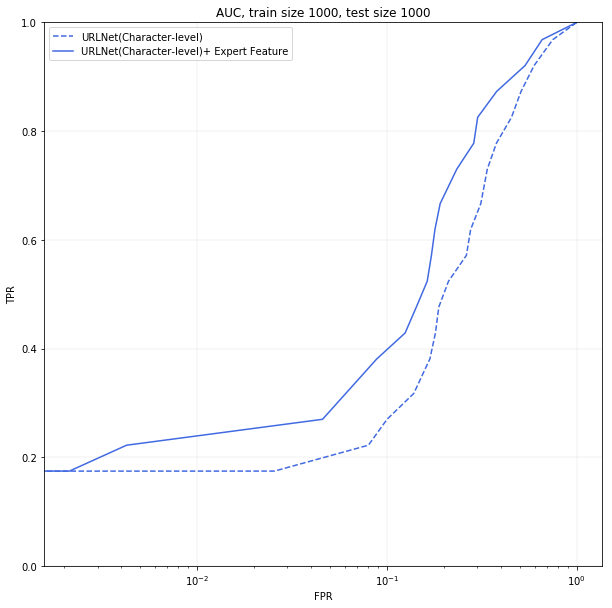

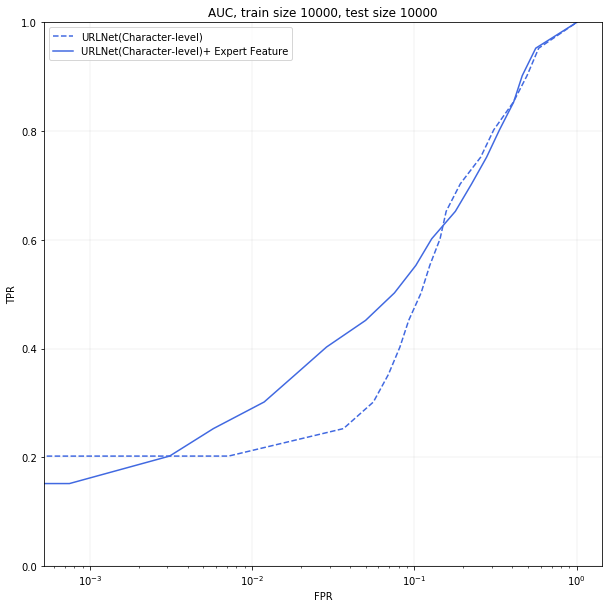

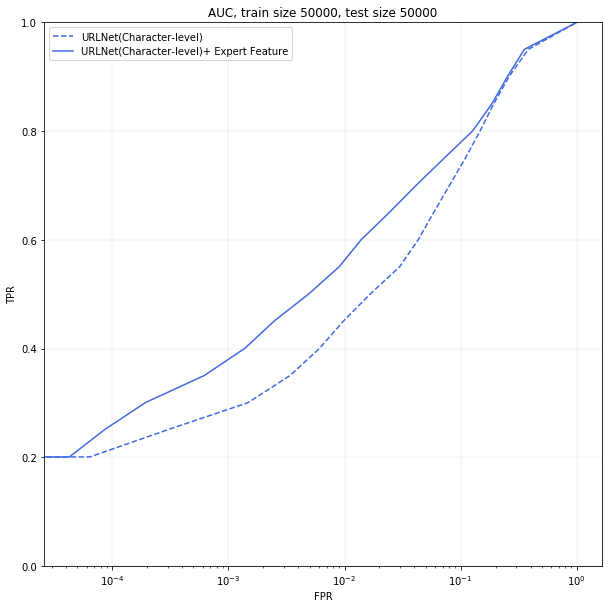

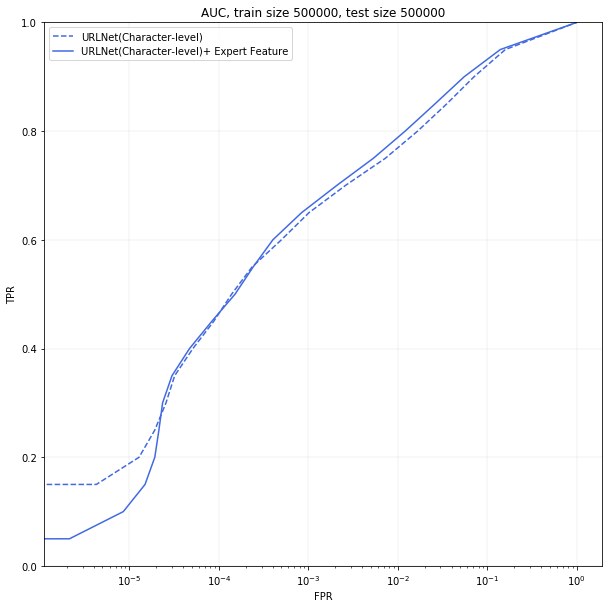

In [9]:
# compare only delimit mode=1
for df in [df_small, df_med, df_large, df_full]:
    dfp = df[(df.embed_mode == CHAR) ] 
    plotauc(dfp)

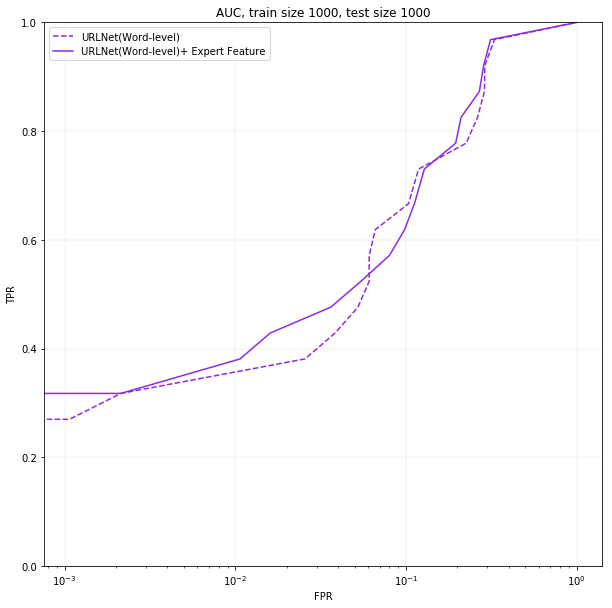

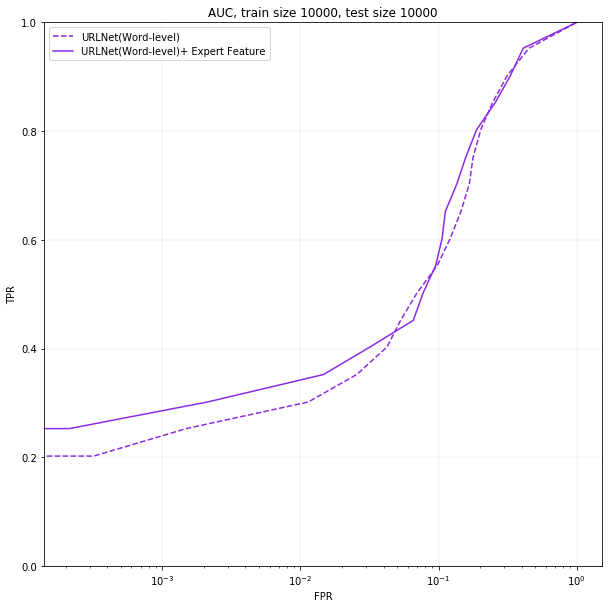

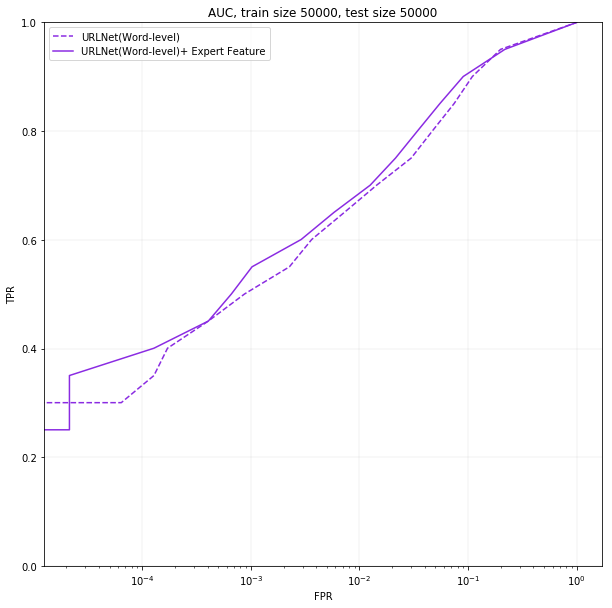

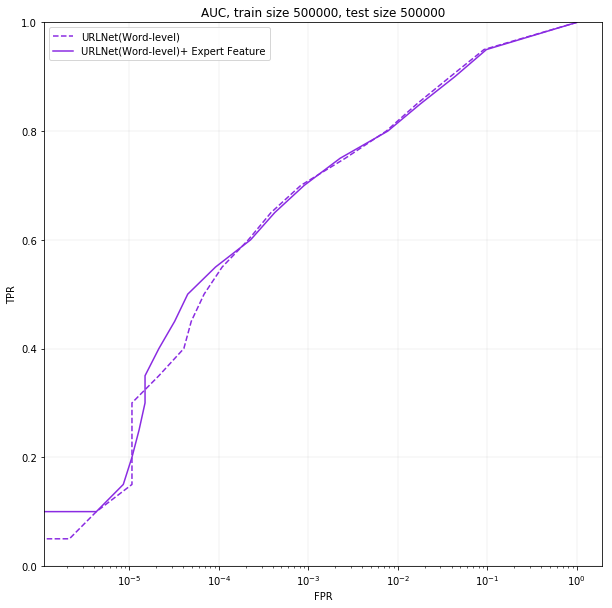

In [10]:
for df in [df_small, df_med, df_large, df_full]:
    dfp = df[(df.embed_mode == WORD) ] 
    plotauc(dfp)

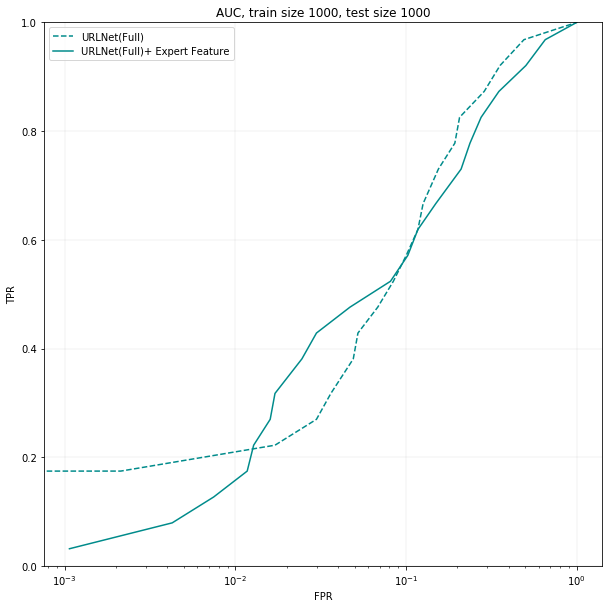

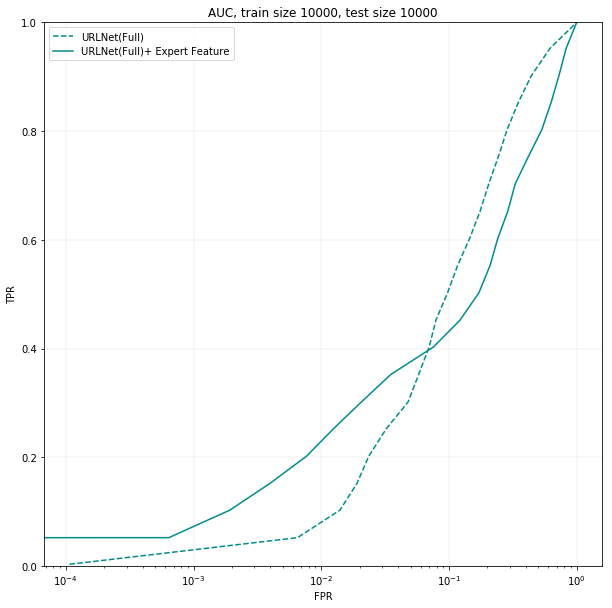

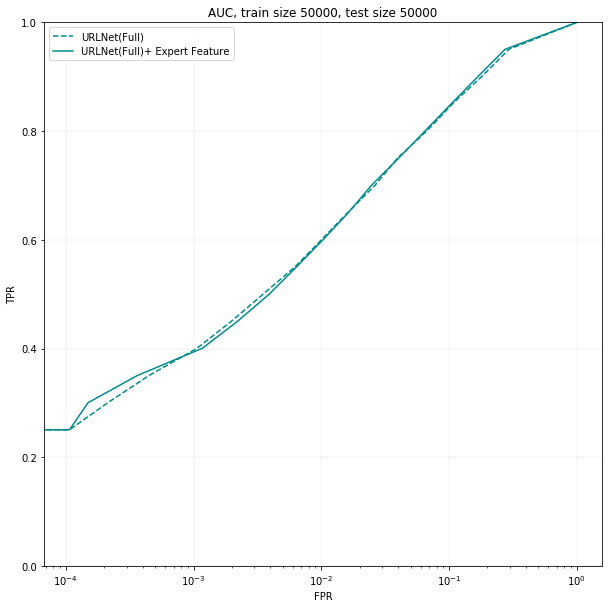

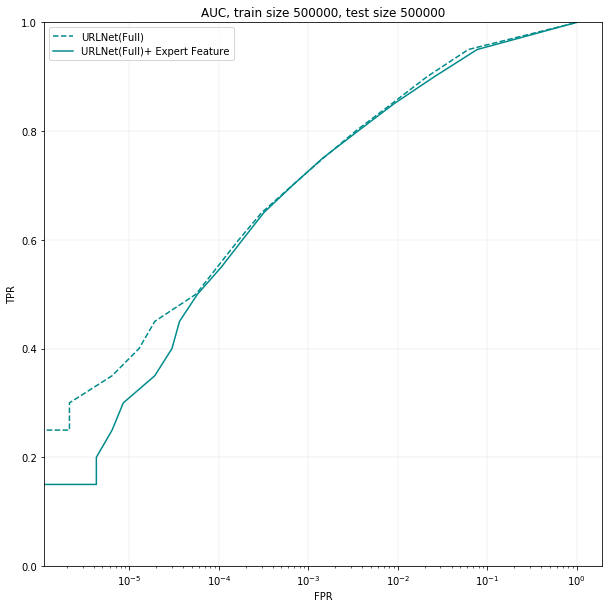

In [11]:
for df in [df_small, df_med, df_large, df_full]:
    dfp = df[(df.embed_mode == CHARWORD_AND_WORD_AND_CHAR) ] 
    plotauc(dfp)

In [12]:
# values of TPR when FPR is close to 0.1
dfp.loc[dfp[(dfp.FPR <= 0.1)].groupby(['folder'])['FPR'].idxmax()]

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
313,0.030952,30076,28749,0.950058,0.061384,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,0
103,0.022949,30076,36061,0.950058,0.076997,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,1


In [13]:
# values of TPR when FPR is close to 0.1
dfp.loc[dfp[(dfp.FPR <= 0.1)].groupby(['folder'])['FPR'].idxmax()]

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
313,0.030952,30076,28749,0.950058,0.061384,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,0
103,0.022949,30076,36061,0.950058,0.076997,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,1


In [14]:
# values of TPR when FPR is close to 0.1
dfp.loc[dfp[(dfp.FPR <= 0.1)].groupby(['folder'])['FPR'].idxmax()]

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
313,0.030952,30076,28749,0.950058,0.061384,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,0
103,0.022949,30076,36061,0.950058,0.076997,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,1
